In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

Train_Dir = 'training.csv'
Test_Dir = 'test.csv'
lookid_dir = 'IdLookupTable.csv'
train_data = pd.read_csv(Train_Dir)  
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)

train_data.fillna(method = 'ffill',inplace = True)
imag = []
for i in range(0,7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96)
training = train_data.drop('Image',axis = 1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]

    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])

model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mae','accuracy'])


KeyError: ignored

In [0]:
model.fit(X_train,y_train,epochs = 500,batch_size = 128,validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 5639 samples, validate on 1410 samples
Epoch 1/500
5639/5639 [==============================] - 2s 391us/step - loss: 17569.5544 - mean_absolute_error: 81.8529 - acc: 0.1138 - val_loss: 2709.7064 - val_mean_absolute_error: 48.5312 - val_acc: 0.0000e+00
Epoch 2/500
5639/5639 [==============================] - 2s 307us/step - loss: 2665.3183 - mean_absolute_error: 48.0923 - acc: 0.0145 - val_loss: 2705.4955 - val_mean_absolute_error: 48.4938 - val_acc: 0.0000e+00
Epoch 3/500
5639/5639 [==============================] - 2s 313us/step - loss: 2660.9040 - mean_absolute_error: 48.0525 - acc: 0.1371 - val_loss: 2700.8321 - val_mean_absolute_error: 48.4516 - val_acc: 0.3121
Epoch 4/500
5639/5639 [==============================] - 2s 316us/step - loss: 2656.0514 - mean_absolute_error: 48.0081 - acc: 0.3705 - val_loss: 2695.6971 - val_mean_absolute_error: 48.4047 - val_acc: 0.3121
Epoch 5/500
5639/5639 [==============================] - 2s

In [0]:

model.save('my_model.h5')
pred = model.predict(X_test)

## Test data result

변수에 data 저장 및 model load

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os
new_model = keras.models.load_model('my_model.h5')
new_model.summary()
#preparing test data
test_data = pd.read_csv('test.csv')
timag = []
for i in range(0,1783):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                19

Test data =image


**cv2.imread **-> numpy array , uint8, BGR (cv2.cvtColor(img, cv2.BGR2RGB))




학습시는 tensor 로 들어감 / dataloader
전처리
- gray scale : cv2.cvtColor(img, cv2.RGB2GRAY)  
- [0, 1] 사이 조정 img= cv2.resize(img, (w,h))/255


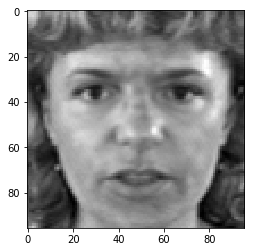

In [0]:
plt.imshow(X_test[7], cmap='gray')
plt.show()


[[66.36112  37.599606 30.24789  ... 74.687386 48.51857  79.072975]
 [66.36112  37.599606 30.24789  ... 74.687386 48.51857  79.072975]
 [66.36112  37.599606 30.24789  ... 74.687386 48.51857  79.072975]
 ...
 [66.36112  37.599606 30.24789  ... 74.687386 48.51857  79.072975]
 [66.36112  37.599606 30.24789  ... 74.687386 48.51857  79.072975]
 [66.36112  37.599606 30.24789  ... 74.687386 48.51857  79.072975]]


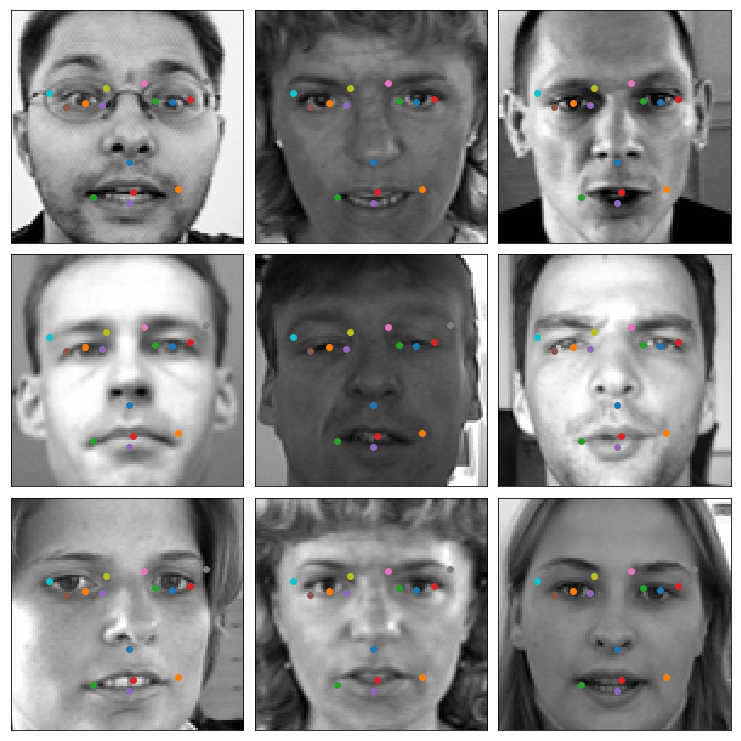

In [0]:
y_test = new_model.predict(X_test)
fig = plt.figure(figsize=(10,10))

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i], cmap='gray')
    for p in range(0, 30,2):
      ax.scatter( y_test[i][p],y_test[i][p+1],marker='o')

print(y_test)

아래는 일반적인 사진에서 face detect 한 영역에 대해 face key point 추출 후 original image에 그리는 함수 

Number of faces detected: 1
[66.36112  37.59961  30.247894 37.90692  59.24801  36.868706 73.69272
 35.9655   37.23403  38.814068 22.282917 39.420536 54.493378 29.677977
 80.33976  28.744509 39.03932  31.69497  15.332214 33.723625 48.342808
 62.03542  68.75102  73.524734 33.67759  76.81646  50.09194  74.68739
 48.51857  79.072975]


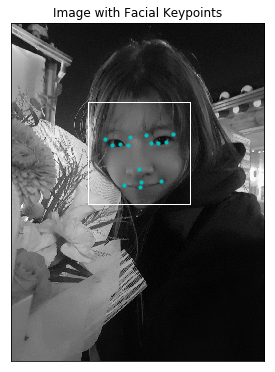

In [0]:
# Use the face detection code with our trained conv-net
def plot_keypoints2(img, face_cascade_path, model_path, scale=1.2, neighbors=5, key_size=10):
    
    face_cascade=cv2.CascadeClassifier(face_cascade_path) 

    img = np.uint8(img)
    faces = face_cascade.detectMultiScale(img, scale, neighbors)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(121, xticks=[], yticks=[])
    ax.set_title('Image with Facial Keypoints')

    # Print the number of faces detected in the image
    print('Number of faces detected:', len(faces))

    # Make a copy of the orginal image to draw face detections on
    image_with_detections = np.copy(img)
    # Get the bounding box for each detected face
    for (x,y,w,h) in faces:
        # Add a red bounding box to the detections image
        cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
        gray_crop = image_with_detections[y:y+h, x:x+w]
       
        orig_shape_crop = gray_crop.shape
        
        resize_gray_crop = cv2.resize(gray_crop, (96, 96)) / 255
        model = keras.models.load_model(model_path)
        landmarks = np.squeeze(model.predict(
            np.expand_dims(resize_gray_crop,  axis=0)))
        
        ax.scatter(landmarks[0::2]*(orig_shape_crop[0]/96.0)+x, 
                   landmarks[1::2]*(orig_shape_crop[1]/96.0)+y, 
                   marker='o', c='c', s=key_size)
       
    ax.imshow(image_with_detections, cmap='gray')


img_path='i1.jpg'
img=cv2.imread(img_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray_img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
obamas = plot_keypoints2(gray_img,
                        'haarcascade_frontalface_default.xml',
                        'my_model.h5')

# **KIW2 ** 

test points

0,1: left_eye_center

2,3: right_eye_center

4,5: left_eye_inner_corner

6,7: left_eye_outer_corner

8,9: right_eye_inner_corner

10,11: right_eye_outer_corner

**12,13: left_eyebrow_inner_end**

**14,15: left_eyebrow_outer_end**

**16,17: right_eyebrow_inner_end**

**18,19: right_eyebrow_outer_end**

20,21: nose_tip

22,23: mouth_left_corner

24,25: mouth_right_corner

26,27: mouth_center_top_lip

28,29: mouth_center_bottom_lip

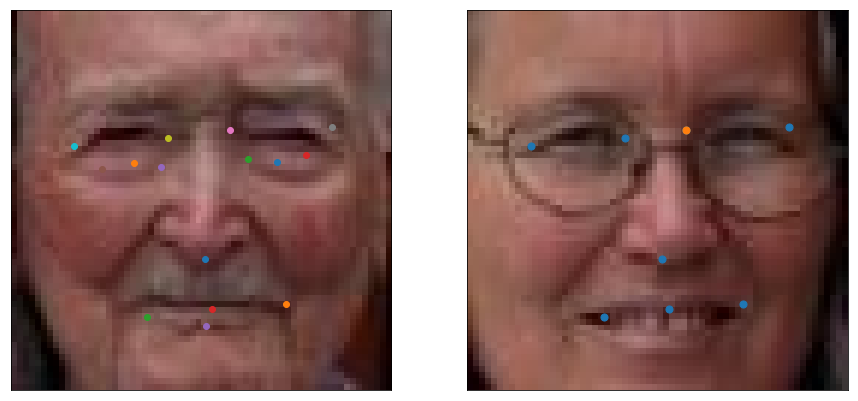

In [0]:


img_path='fd_023_1.jpg'
img1=cv2.imread(img_path)
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
gray_img=cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
gray_img=cv2.resize(gray_img,(96,96))
gray_img=np.expand_dims(gray_img,  axis=0)
y1 = np.squeeze(new_model.predict(gray_img))

img_path='fd_023_2.jpg'
img2=cv2.imread(img_path)
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
resize_img=cv2.resize(img2,(96,96))
gray_img=cv2.cvtColor(resize_img,cv2.COLOR_RGB2GRAY)
gray_img=np.expand_dims(gray_img,  axis=0)
y2 =np.squeeze( new_model.predict(gray_img))


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
#ax.scatter(y1[0], y1[1], marker='o', s=50)
#ax.scatter(y1[2::2], y1[3::2], marker='o', s=50)


for p in range(0, 30,2):
      ax.scatter( y_test[i][p]*64/96,y_test[i][p+1]*64/96,marker='o')

ax.imshow(img1)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
ax.scatter(y2[12:28:2]*64/96, y2[13:29:2]*64/96, marker='o', s=50)
ax.scatter(y2[12]*64/96, y2[13]*64/96, marker='o', s=50)


ax.imshow(img2)


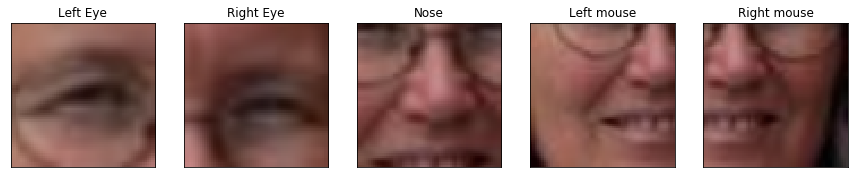

In [0]:

resize_img=cv2.resize(img2,(96,96))
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1, 5, 1, xticks=[], yticks=[])

x1=int(y2[18])-5
x2=int(y2[16])+5
t=int((x2-x1)/2)
y=(y2[17]+y2[19])/2
y=int(y)
left_eye= resize_img[max(0,y-t):min(96,y+t),x1:x2]
left_eye=cv2.resize(left_eye,(64,64))
ax.set_title('Left Eye')
ax.imshow(left_eye)



ax = fig.add_subplot(1, 5, 2, xticks=[], yticks=[])
x1=int(y2[12])-5
x2=int(y2[14])+5
t=int((x2-x1)/2)
y=(y2[13]+y2[15])/2
y=int(y)


resize_img=cv2.resize(img2,(96,96))
right_eye= resize_img[max(0,y-t):min(96,y+t),x1:x2]
right_eye=cv2.resize(right_eye,(64,64))
ax.set_title('Right Eye')
ax.imshow(right_eye)



ax = fig.add_subplot(1, 5, 3, xticks=[], yticks=[])
x=int(y2[20]/2)
y=int(y2[21]/2)
Nose= resize_img[y:min(y+48,96),x:min(x+48,96)]
Nose=cv2.resize(Nose,(64,64))
ax.set_title('Nose')
ax.imshow(Nose)

ax = fig.add_subplot(1, 5, 4, xticks=[], yticks=[])
t=int(y2[20])

left_mouse= resize_img[t-10:96,:t+10]
left_mouse=cv2.resize(left_mouse,(64,64))
ax.set_title('Left mouse')
ax.imshow(left_mouse)



ax = fig.add_subplot(1, 5, 5, xticks=[], yticks=[])
t=int(y2[20]) -10

right_mouse= resize_img[t:96,t:96]
right_mouse=cv2.resize(right_mouse,(64,64))
ax.set_title('Right mouse')
ax.imshow(right_mouse)




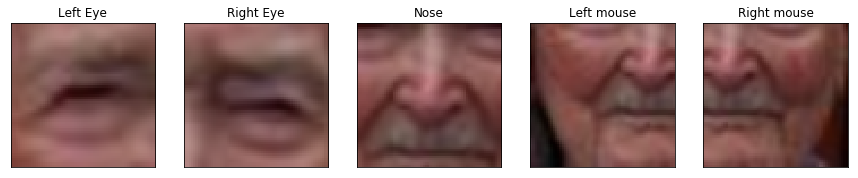

In [0]:
#img2 size:(64,64,3)  y2 size  (30)
def cutimg(img2,y2):

  resize_img=cv2.resize(img2,(96,96))
  fig = plt.figure(figsize=(15,15))
  ax = fig.add_subplot(1, 5, 1, xticks=[], yticks=[])

  x1=int(y2[18])-5
  x2=int(y2[16])+5
  t=int((x2-x1)/2)
  y=(y2[17]+y2[19])/2
  y=int(y)
  left_eye= resize_img[max(0,y-t):min(96,y+t),x1:x2]
  left_eye=cv2.resize(left_eye,(64,64))
  ax.set_title('Left Eye')
  ax.imshow(left_eye)



  ax = fig.add_subplot(1, 5, 2, xticks=[], yticks=[])
  x1=int(y2[12])-5
  x2=int(y2[14])+5
  t=int((x2-x1)/2)
  y=(y2[13]+y2[15])/2
  y=int(y)


  resize_img=cv2.resize(img2,(96,96))
  right_eye= resize_img[max(0,y-t):min(96,y+t),x1:x2]
  right_eye=cv2.resize(right_eye,(64,64))
  ax.set_title('Right Eye')
  ax.imshow(right_eye)



  ax = fig.add_subplot(1, 5, 3, xticks=[], yticks=[])
  x=int(y2[20]/2)
  y=int(y2[21]/2)
  Nose= resize_img[y:min(y+48,96),x:min(x+48,96)]
  Nose=cv2.resize(Nose,(64,64))
  ax.set_title('Nose')
  ax.imshow(Nose)

  ax = fig.add_subplot(1, 5, 4, xticks=[], yticks=[])
  t=int(y2[20])

  left_mouse= resize_img[t-10:96,:t+10]
  left_mouse=cv2.resize(left_mouse,(64,64))
  ax.set_title('Left mouse')
  ax.imshow(left_mouse)



  ax = fig.add_subplot(1, 5, 5, xticks=[], yticks=[])
  t=int(y2[20]) -10

  right_mouse= resize_img[t:96,t:96]
  right_mouse=cv2.resize(right_mouse,(64,64))
  ax.set_title('Right mouse')
  ax.imshow(right_mouse)

cutimg(img1,y1)


In [0]:
import os

os.mkdir('./r')

다시 학습- 0507newmodel.ipynb


학습3차 ---------------------------------------------------------------------------------

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D,concatenate,Input
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.layers import Flatten, Dense
from keras.layers.normalization import BatchNormalization


# Build a CNN architecture

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3,padding='same', activation='relu', input_shape=(96, 96, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(axis=-1, momentum=0.99))

model.add(Conv2D(filters=32, kernel_size=3, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(axis=-1, momentum=0.99))

model.add(Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(axis=-1, momentum=0.99))

model.add(Conv2D(filters=128, kernel_size=3, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(axis=-1, momentum=0.99))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization(axis=-1, momentum=0.99))

model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))


model.add(Dense(30))


# Summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 96, 96, 16)        160       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 48, 48, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 64)        18496     
__________

VGG net 은 3channel input = 망 

In [0]:
from keras.applications.vgg16 import VGG16, decode_predictions
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D,concatenate,Input
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.layers import Flatten, Dense
from keras.layers.normalization import BatchNormalization

vgg_model = VGG16(weights='imagenet',
                               include_top=False,
                               input_shape=(96, 96, 3))



In [0]:
# Creating dictionary that maps layer names to the layers
layer_dict = dict([(layer.name, layer) for layer in vgg_model.layers])
print(layer_dict)
# Getting output tensor of the last VGG layer that we want to include
x = layer_dict['block5_pool'].output

# Stacking a new simple convolutional network on top of it    
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(30)(x)

# Creating new model. Please note that this is NOT a Sequential() model.
from keras.models import Model
model = Model(input=vgg_model.input, output=x)

# Make sure that the pre-trained bottom layers are not trainable
for layer in model.layers[:22]:
    layer.trainable = False

# Do not forget to compile it
model.compile(loss='mse',
                     optimizer='adam',
                     metrics=['accuracy'])
model.summary()

{'input_2': <keras.engine.input_layer.InputLayer object at 0x7fb8d2f9ed30>, 'block1_conv1': <keras.layers.convolutional.Conv2D object at 0x7fb8d2cc2400>, 'block1_conv2': <keras.layers.convolutional.Conv2D object at 0x7fba3a63d0b8>, 'block1_pool': <keras.layers.pooling.MaxPooling2D object at 0x7fb8d2cf8c50>, 'block2_conv1': <keras.layers.convolutional.Conv2D object at 0x7fb8d2de1d30>, 'block2_conv2': <keras.layers.convolutional.Conv2D object at 0x7fba31e44470>, 'block2_pool': <keras.layers.pooling.MaxPooling2D object at 0x7fb8d2cc2e48>, 'block3_conv1': <keras.layers.convolutional.Conv2D object at 0x7fb8d2cc2b00>, 'block3_conv2': <keras.layers.convolutional.Conv2D object at 0x7fb8d2c89a20>, 'block3_conv3': <keras.layers.convolutional.Conv2D object at 0x7fb8d2c33198>, 'block3_pool': <keras.layers.pooling.MaxPooling2D object at 0x7fb8d2c4ba90>, 'block4_conv1': <keras.layers.convolutional.Conv2D object at 0x7fb8d2c4b5c0>, 'block4_conv2': <keras.layers.convolutional.Conv2D object at 0x7fb8d2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


In [0]:


from keras.callbacks import ModelCheckpoint, History
from keras.optimizers import Adam


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

Train_Dir = 'training.csv'
train_data = pd.read_csv(Train_Dir)  
train_data.fillna(method = 'ffill',inplace = True)
imag = []
for i in range(0,7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]    
    imag.append(img)
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96)
training = train_data.drop('Image',axis = 1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]
    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

X_train=np.expand_dims(X_train,axis=4)
hist = History()
epochs = 60
batch_size = 128

checkpointer = ModelCheckpoint(filepath='weights.final_2.hdf5', 
                               verbose=1, save_best_only=True)


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


In [0]:
## TODO: Compile the model
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D,concatenate,Input
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.layers import Flatten, Dense
from keras.layers.normalization import BatchNormalization

img_conc = np.concatenate([X_train, X_train, X_train],axis=-1)   
print(img_conc.shape)
hist_final = model.fit(img_conc, y_train, validation_split=0.2,
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist], verbose=1)


model.save('my_model5.h5')

(7049, 96, 96, 3)
Instructions for updating:
Use tf.cast instead.
Train on 5639 samples, validate on 1410 samples
Epoch 1/60
5639/5639 [==============================] - 13s 2ms/step - loss: 953.4752 - acc: 0.0780 - val_loss: 202.8265 - val_acc: 0.1539

Epoch 00001: val_loss improved from inf to 202.82653, saving model to weights.final_2.hdf5
Epoch 2/60
5639/5639 [==============================] - 7s 1ms/step - loss: 239.0520 - acc: 0.2178 - val_loss: 153.2065 - val_acc: 0.3865

Epoch 00002: val_loss improved from 202.82653 to 153.20647, saving model to weights.final_2.hdf5
Epoch 3/60
5639/5639 [==============================] - 7s 1ms/step - loss: 219.8689 - acc: 0.2555 - val_loss: 147.9345 - val_acc: 0.3851

Epoch 00003: val_loss improved from 153.20647 to 147.93448, saving model to weights.final_2.hdf5
Epoch 4/60
5639/5639 [==============================] - 7s 1ms/step - loss: 205.7008 - acc: 0.2619 - val_loss: 142.8816 - val_acc: 0.4142

Epoch 00004: val_loss improved from 147.9344

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D,concatenate,Input
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.layers import Flatten, Dense
from keras.layers.normalization import BatchNormalization

model= keras.models.load_model('my_model5.h5')
img_conc2=np.expand_dims(X_test,axis=4)
img_conc2 = np.concatenate([img_conc2, img_conc2, img_conc2],axis=-1) 
print(img_conc2.shape)
po=model.predict (img_conc2)
print(po)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


(1783, 96, 96, 3)
[[58.34829  34.520187 27.719484 ... 63.439278 44.3308   71.425865]
 [63.16373  35.47242  27.935442 ... 68.057755 45.016148 77.672905]
 [57.547367 33.194065 27.718891 ... 63.70781  42.680454 68.727165]
 ...
 [60.616337 34.268833 28.014055 ... 68.36028  43.96795  72.14594 ]
 [71.51897  40.273087 34.232468 ... 82.389366 52.22535  84.61845 ]
 [43.745075 25.285738 20.258644 ... 50.99396  32.25583  52.067432]]


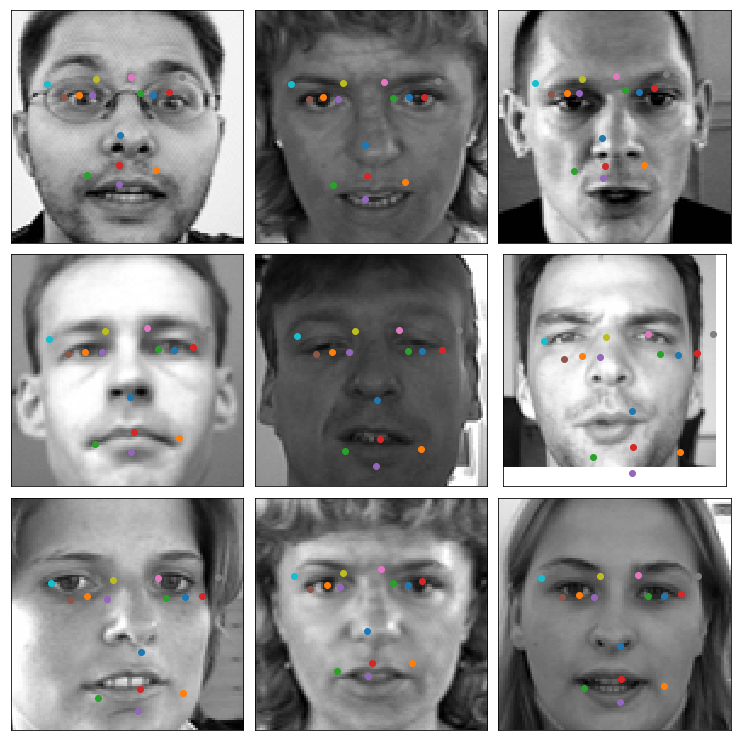

In [0]:
fig = plt.figure(figsize=(10,10))

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i], cmap='gray')
    for p in range(0, 30,2):
      ax.scatter( po[i][p],po[i][p+1],marker='o')



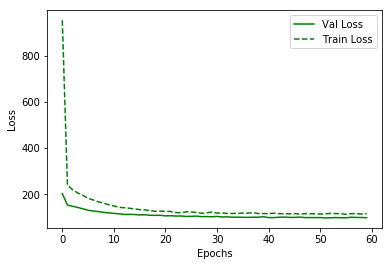

Number of faces detected: 2
(96, 96, 3)
(1, 96, 96, 3)
[ 90.40303   52.983326  43.81197   53.53631   80.62172   52.247444
 100.70705   50.58091   51.707645  54.34401   31.603796  55.062096
  73.18656   41.691097 109.54491   40.74343   53.71425   43.895622
  21.071259  46.825348  64.80548   86.77988   94.49609  101.054634
  46.56297  105.63243   68.247955 103.47412   66.22471  107.11326 ]
127 72
114 114
(96, 96, 3)
(1, 96, 96, 3)
[ 99.30821   55.712986  46.353813  55.60768   88.49463   55.49121
 109.70159   54.092136  55.05658   57.38045   34.835033  58.33764
  82.42594   43.510284 119.37716   42.633263  58.045692  45.604168
  23.476736  47.52915   71.89523   93.338806 100.97278  109.60345
  50.95774  113.94935   74.58136  110.98443   71.66564  118.763504]
255 117
109 109


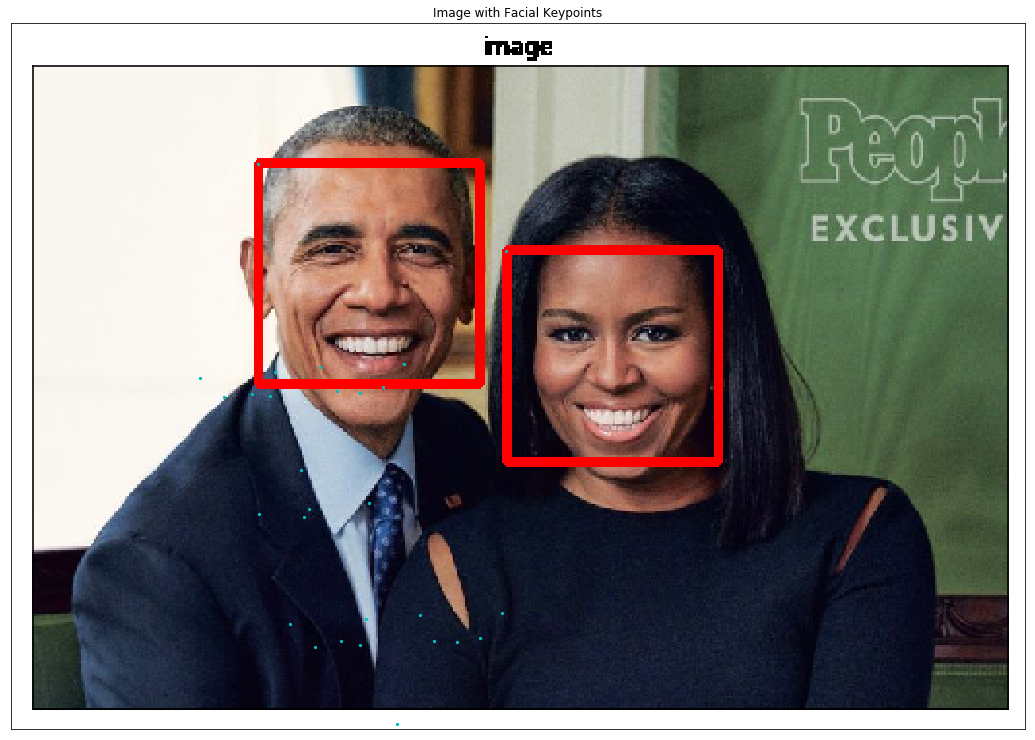

In [0]:

# Visualize the training and validation loss of the neural network
plt.plot(range(epochs), hist_final.history[
         'val_loss'], 'g-', label='Val Loss')
plt.plot(range(epochs), hist_final.history[
         'loss'], 'g--', label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Use the face detection code with our trained conv-net
import cv2
def plot_keypoints3(gray_img, face_cascade_path, model_path, scale=1.2, neighbors=5, key_size=5):
    
    face_cascade=cv2.CascadeClassifier(face_cascade_path) 

    gray_img = np.uint8(gray_img)
    faces = face_cascade.detectMultiScale(gray_img, scale, neighbors)
    fig = plt.figure(figsize=(40, 40))
    ax = fig.add_subplot(121, xticks=[], yticks=[])
    ax.set_title('Image with Facial Keypoints')

    # Print the number of faces detected in the image
    print('Number of faces detected:', len(faces))

    # Make a copy of the orginal image to draw face detections on
    image_with_detections = np.copy(img)
    # Get the bounding box for each detected face
    for (x,y,w,h) in faces:
        # Add a red bounding box to the detections image
        cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
        crop = image_with_detections[y:y+h, x:x+w]
       
        orig_shape_crop = crop.shape
        
        resize_crop = cv2.resize(crop, (96, 96)) 
        model = keras.models.load_model(model_path)
        print(resize_crop.shape)
        k= np.expand_dims(resize_crop, axis=0)
        print(k.shape)
       
        landmarks = np.squeeze(model.predict(k))
        print (landmarks)
        print(x,y)
        print(w,h)
        ax.scatter(x,y,
                   marker='o', c='c', s=key_size)
        ax.scatter((landmarks[0::2])*(orig_shape_crop[0]/96)+x, 
                   (landmarks[1::2])*(orig_shape_crop[1]/96)+y, 
                   marker='o', c='c', s=key_size)
    ax.imshow(image_with_detections, cmap='gray')


img_path='d.jpg'
img=cv2.imread(img_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray_img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
## 

obamas = plot_keypoints3(gray_img,
                        'haarcascade_frontalface_default.xml',
                        'my_model5.h5')

Check results

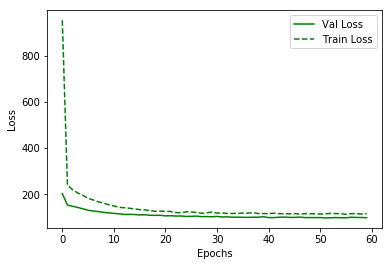

(1440, 1080)
Number of faces detected: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


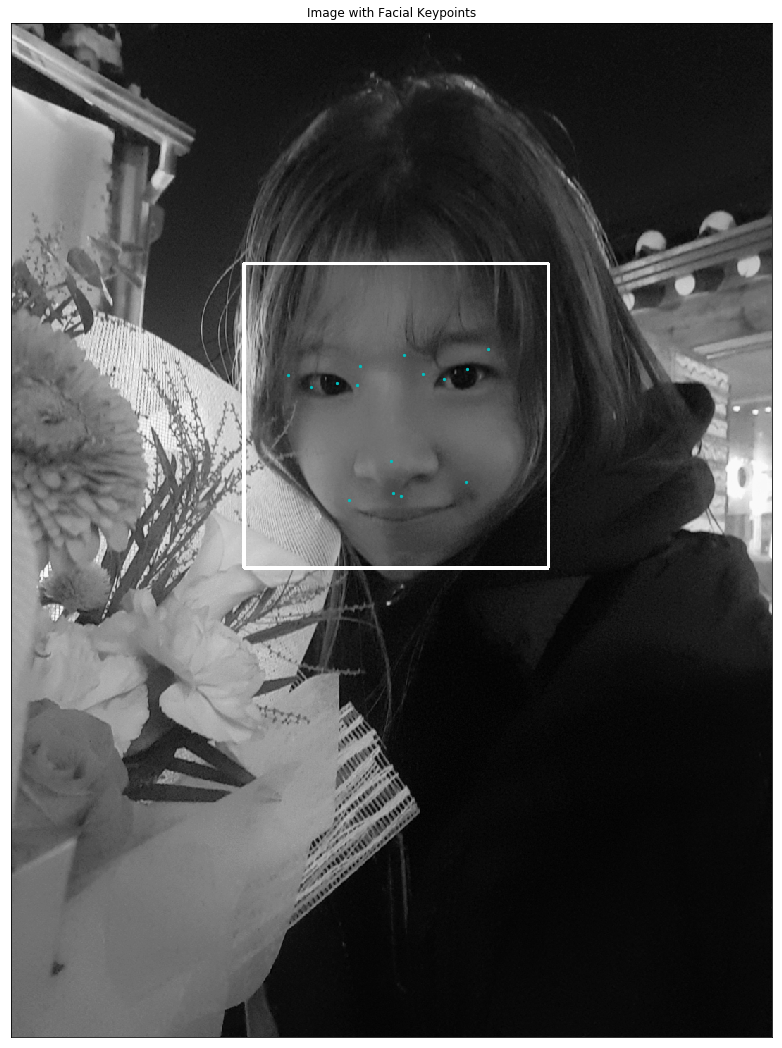

In [0]:
# Visualize the training and validation loss of the neural network
plt.plot(range(epochs), hist_final.history[
         'val_loss'], 'g-', label='Val Loss')
plt.plot(range(epochs), hist_final.history[
         'loss'], 'g--', label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Use the face detection code with our trained conv-net
import cv2
def plot_keypoints2(img, face_cascade_path, model_path, scale=1.2, neighbors=5, key_size=5):
    
    face_cascade=cv2.CascadeClassifier(face_cascade_path) 

    img = np.uint8(img)
    faces = face_cascade.detectMultiScale(img, scale, neighbors)
    fig = plt.figure(figsize=(30, 30))
    ax = fig.add_subplot(121, xticks=[], yticks=[])
    ax.set_title('Image with Facial Keypoints')

    # Print the number of faces detected in the image
    print('Number of faces detected:', len(faces))

    # Make a copy of the orginal image to draw face detections on
    image_with_detections = np.copy(img)
    # Get the bounding box for each detected face
    for (x,y,w,h) in faces:
        # Add a red bounding box to the detections image
        cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
        gray_crop = image_with_detections[y:y+h, x:x+w]
       
        orig_shape_crop = gray_crop.shape
        
        resize_gray_crop = cv2.resize(gray_crop, (96, 96)) / 255
        model = keras.models.load_model(model_path)
        landmarks = np.squeeze(model.predict(
            np.expand_dims(np.expand_dims(resize_gray_crop, axis=4),  axis=0)))
        
        ax.scatter((landmarks[0::2] *orig_shape_crop[0]/96)+x, 
                   (landmarks[1::2] *orig_shape_crop[1]/96)+y, 
                   marker='o', c='c', s=key_size)
    ax.imshow(image_with_detections, cmap='gray')


img_path='i1.jpg'
img=cv2.imread(img_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray_img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
## 
print(gray_img.shape)
obamas = plot_keypoints2(gray_img,
                        'haarcascade_frontalface_default.xml',
                        'my_model4.h5')

Number of faces detected: 2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


Number of faces detected: 2


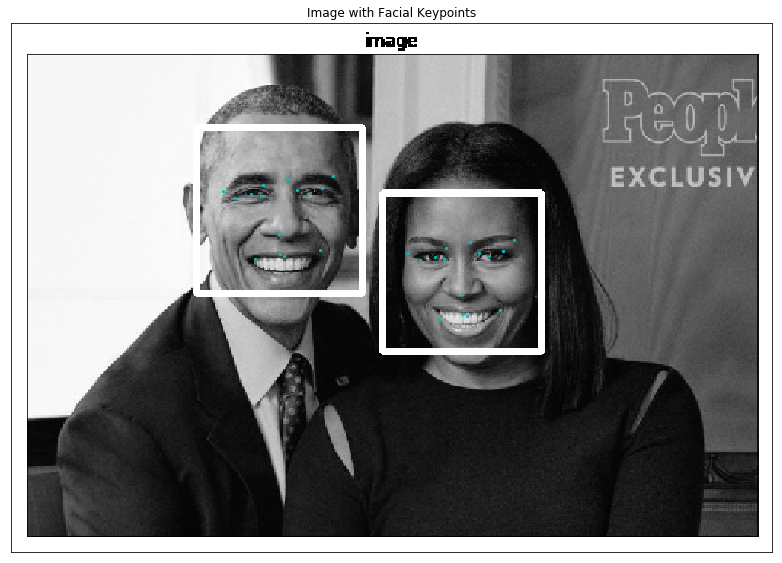

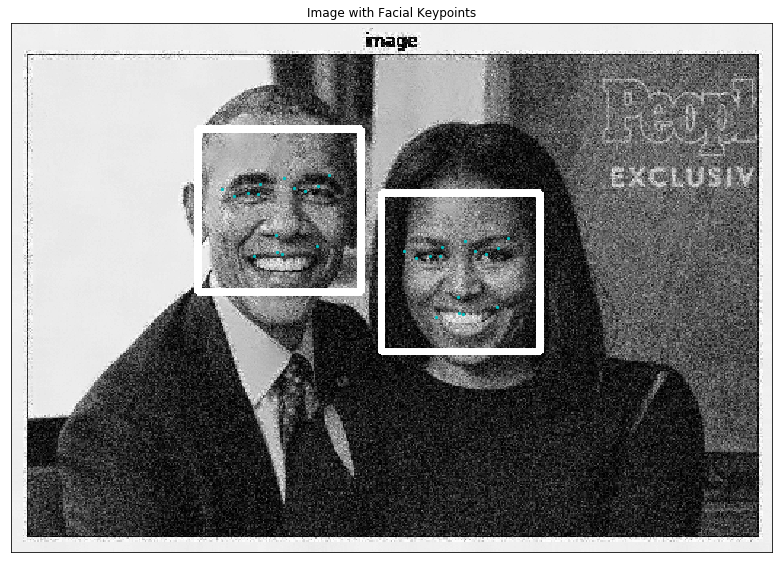

In [0]:
img_path='d.jpg'
img=cv2.imread(img_path)
image=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray_img=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
o=plot_keypoints2(gray_img,'haarcascade_frontalface_default.xml','my_model3.h5')
# Make an array copy of this image
image_with_noise = np.asarray(image)

# Create noise - here we add noise sampled randomly from a Gaussian distribution: a common model for noise
noise_level = 40
noise = np.random.randn(image.shape[0],image.shape[1],image.shape[2])*noise_level

# Add this noise to the array image copy
image_with_noise = image_with_noise + noise

# Convert back to uint8 format
image_with_noise = np.asarray([np.uint8(np.clip(i,0,255)) for i in image_with_noise])


denoised_image = cv2.fastNlMeansDenoisingColored(image_with_noise,None,10,10,7,21)

gray_img=cv2.cvtColor(denoised_image,cv2.COLOR_RGB2GRAY)
o=plot_keypoints2(gray_img,'haarcascade_frontalface_default.xml','my_model4.h5')

Number of faces detected: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


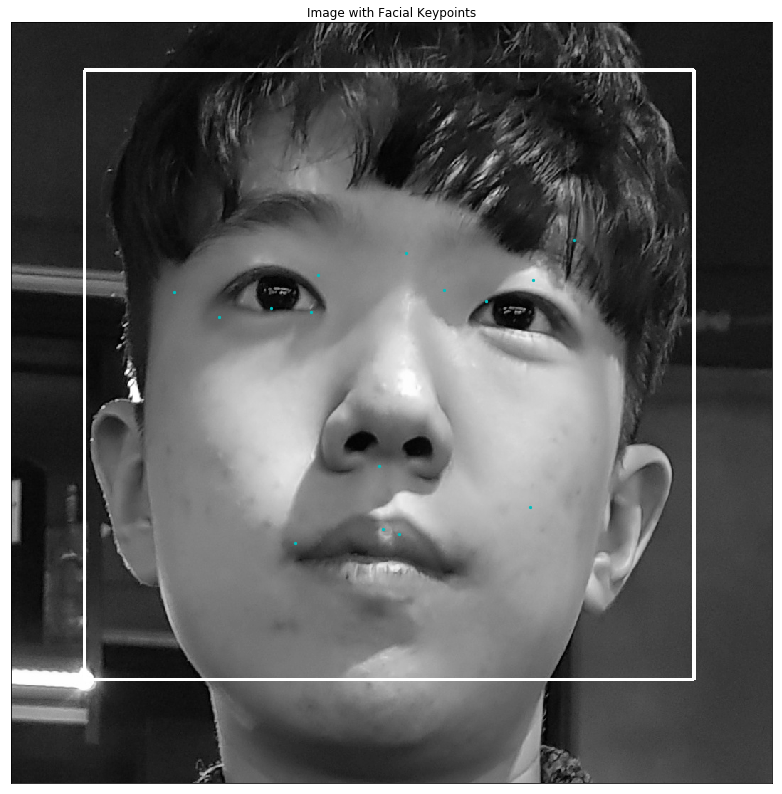

In [0]:
img_path='3.jpg'
img=cv2.imread(img_path)
image=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray_img=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
o=plot_keypoints2(gray_img,'haarcascade_frontalface_default.xml','my_model4.h5')